In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\mrsha'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

# DATA PROCESSING AND DATA CLEANING

In [6]:
df.groupby('area_type')['area_type'].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df1 = df.drop(['area_type','availability','society','balcony'],axis ='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2.shape

(13246, 5)

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\mrsha\AppData\Local\Temp\ipykernel_6736\1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
       return False
    return True

In [19]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num('2199-5199')

3699.0

In [22]:
df3 = df2.copy()

In [23]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

In [24]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
df3.loc[122]

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath             4.0
price          477.0
bhk                4
Name: 122, dtype: object

# FEATURE ENGENEERING AND DIMENTIONALITY REDUCTION TECHNIQUE

In [26]:
df4 =df3.copy()

In [27]:
df4['price_per_sqft'] =df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
len(df4.location.unique())

1304

In [29]:
df4.location = df4.location.apply(lambda x: x.strip())

In [30]:
location_stats =df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [31]:
location_stats.head(50)

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Ramamurthy Nagar             73
Kengeri                      73
Hosa Road                    72

In [32]:
len(location_stats[location_stats<10])

1039

In [33]:
location_stats_lessthaan_10 = location_stats[location_stats<10]
location_stats_lessthaan_10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [34]:
len(df4.location.unique())

1293

In [35]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_lessthaan_10 else x)
len(df4.location.unique())

255

### FINDING OUTLIERS

In [36]:
df4.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


In [37]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [38]:
 df5 = df4[~(df4.total_sqft/df4.bhk<300)]

In [39]:
df5.shape

(12502, 7)

In [40]:
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
df5['price_per_sqft'].mean()

6308.502826047999

In [42]:
def remove_pps_outliers(df):
    df_out =pd.DataFrame()
    for key ,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df =subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Block Koramangala,2 BHK,1415.0,2.0,110.0,2,7773.851590
8,1st Block Koramangala,2 BHK,860.0,2.0,65.5,2,7616.279070
9,1st Block Koramangala,4 BHK,3000.0,3.0,300.0,4,10000.000000


In [43]:
def plot_scatter_chart(df,location):
    bhk2 =df[(df.location==location) & (df.bhk==2)]
    bhk3 =df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']= (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color = 'blue' , label='2 bhk' ,s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker = '+',color = 'green', label='3 bhk' ,s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price per square feet area")
    plt.title(location)
    plt.legend()

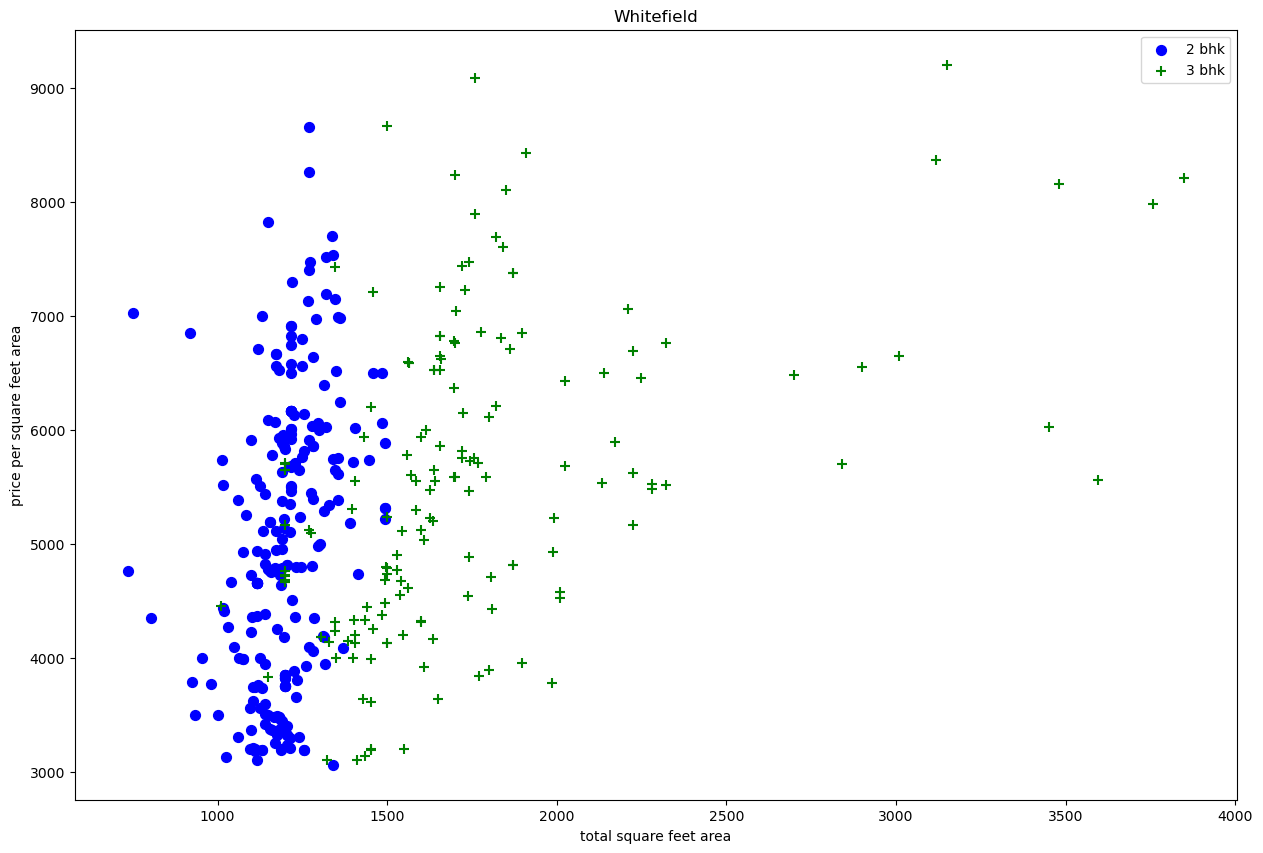

In [44]:
plot_scatter_chart(df6 , 'Whitefield')

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7369, 7)

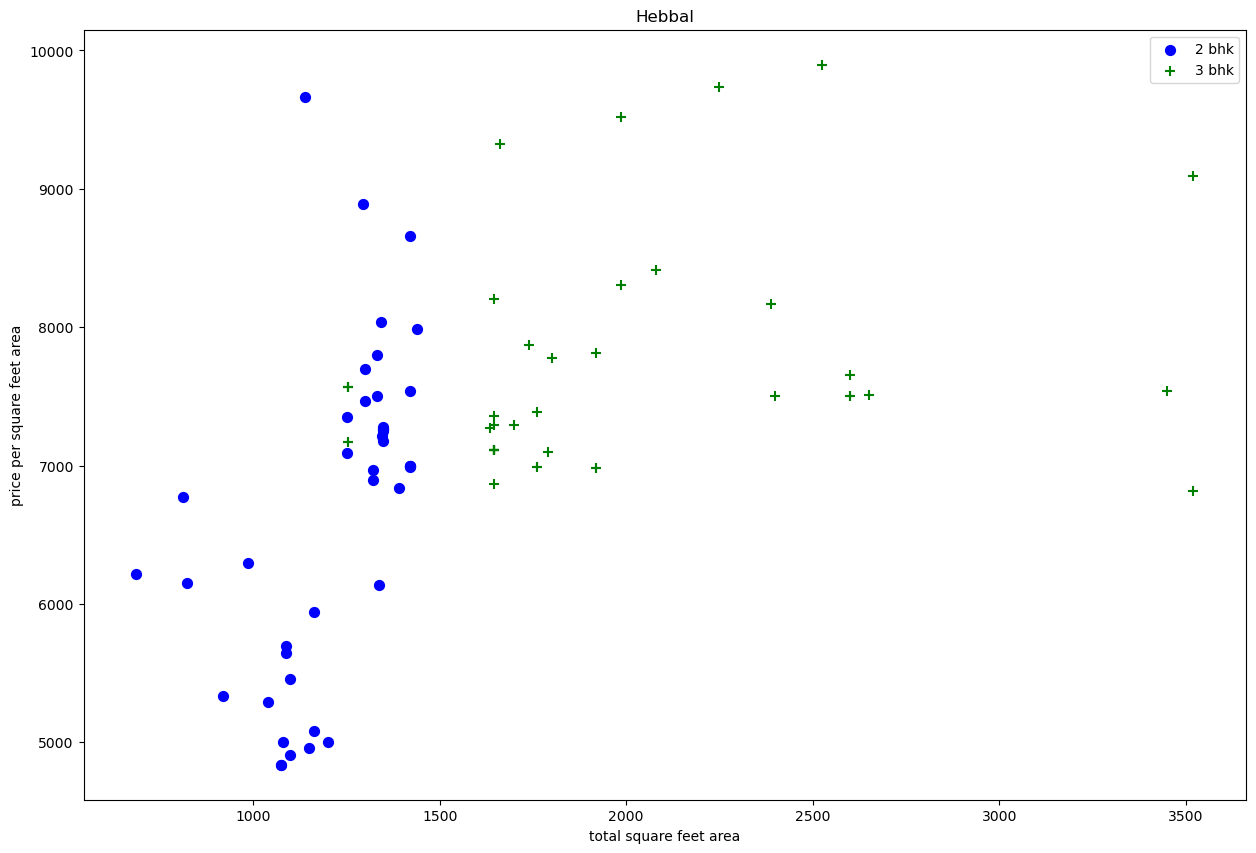

In [46]:
plot_scatter_chart(df7, 'Hebbal')

Text(0, 0.5, 'count')

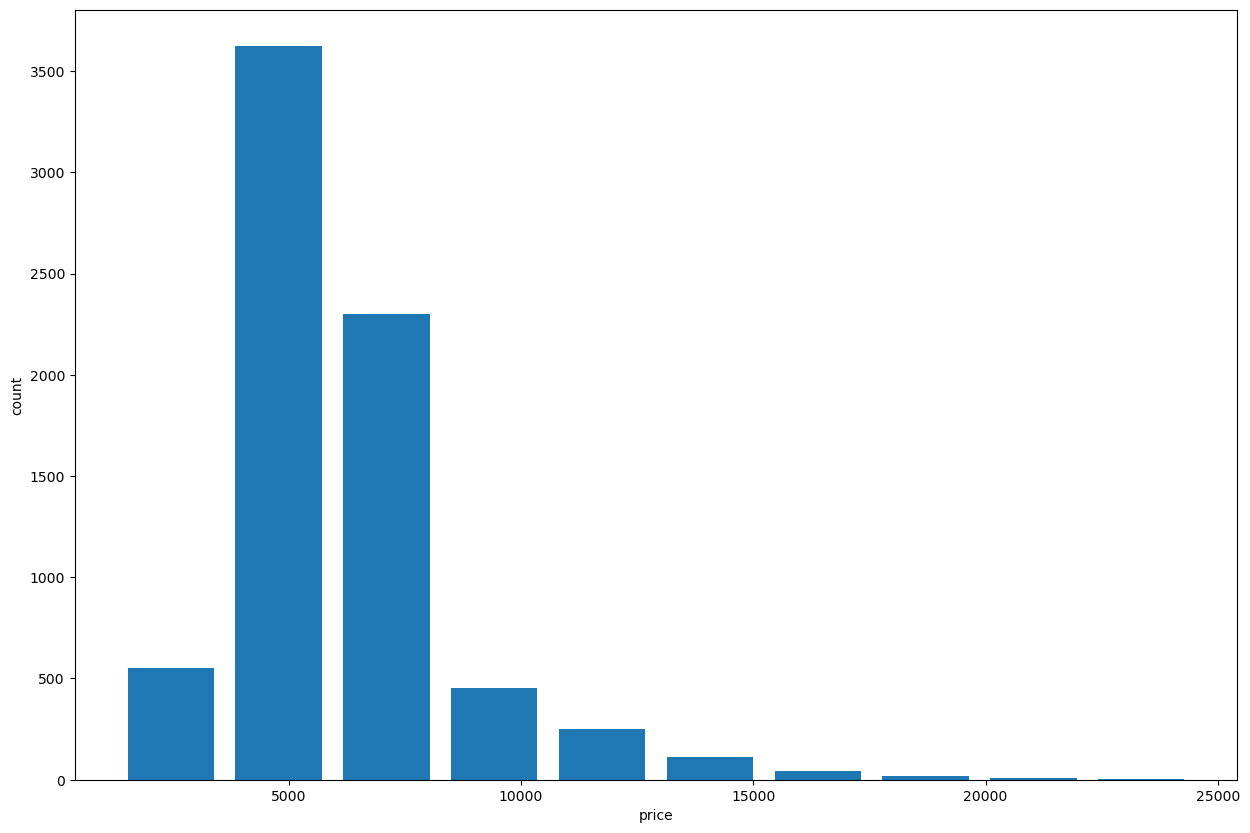

In [47]:
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("price")
plt.ylabel('count')

In [48]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [49]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8547,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8633,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9329,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9642,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

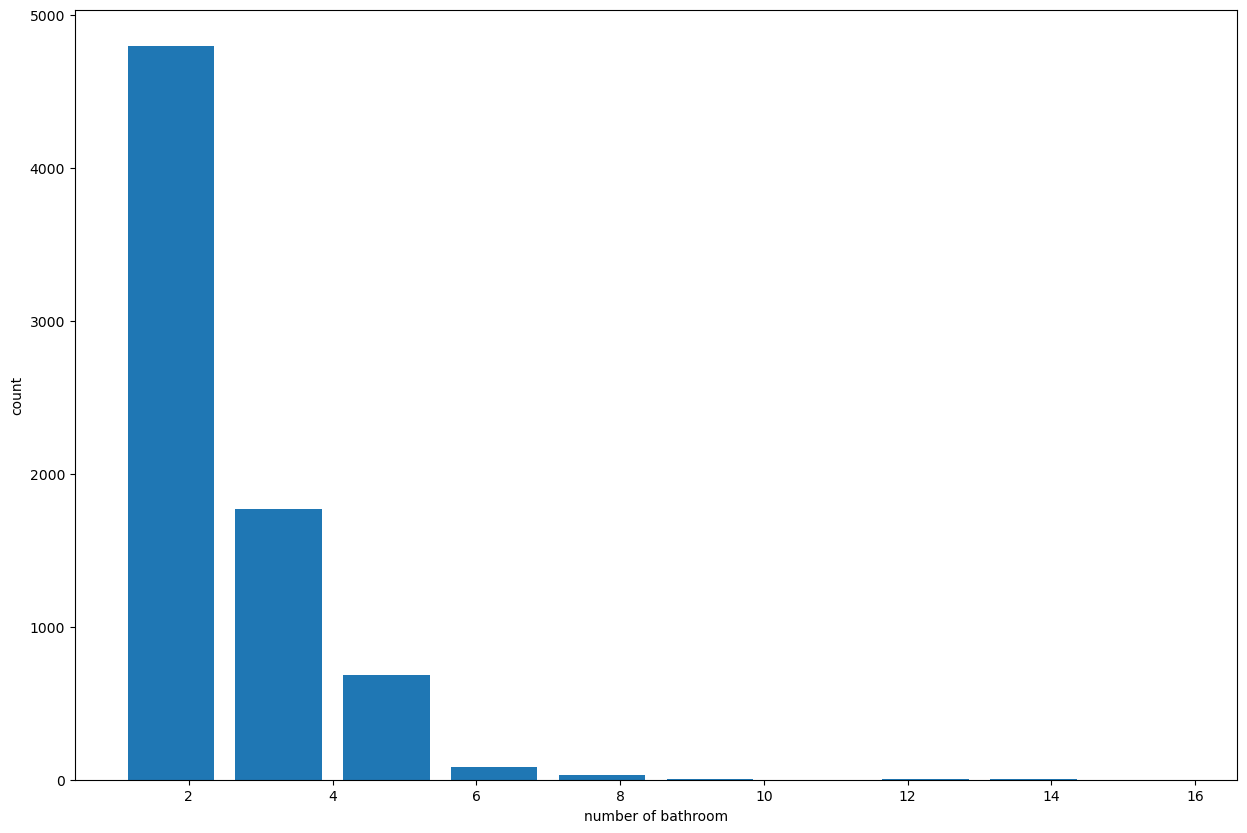

In [50]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("number of bathroom")
plt.ylabel("count")

In [51]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8476,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [52]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7291, 7)

In [53]:
df9 = df8.drop(df8[['size','price_per_sqft']],axis ='columns')
df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# CHANGE CATEGORICAL VALUE INTO NUMERICAL USING ONE HOT ENCODING

In [54]:
dummies = pd.get_dummies(df9.location)
dummies.head(2)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df10 = pd.concat([df9,dummies.drop('other',axis = 'columns')],axis='columns')

In [56]:
df10.head(1)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df10.shape

(7291, 259)

# TRAIN THE DATA

In [58]:
x = df10.drop(['price','location'] , axis = 'columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y = df10['price']

In [60]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =10 )

In [81]:
x_train.shape

(5832, 257)

In [82]:
x_test.shape

(1459, 257)

In [83]:
x_train

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
6943,1089.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1933,770.0,1.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
671,1007.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5630,1295.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8153,1200.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,1260.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4284,1962.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1624,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5716,1525.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# BUILDING MODEL

In [65]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8556662450160801

# CHECKING WHICH PARAMETERS IS BEST USING K-FOLD.CROSS VALIDATION

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.84196276, 0.82904236, 0.90136194, 0.85131228, 0.84354632])

# USING GRIDSEARCHCV

In [69]:

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params':{
                'fit_intercept':[True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree': {
            'model' : DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv = cv, return_train_score= False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


find_best_model_using_gridsearchcv(x,y)

C:\Users\mrsha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mrsha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mrsha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\mrsha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\mrsha\anaconda3\lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.854097,{'fit_intercept': False}
1,lasso,0.703380,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.698962,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [70]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [71]:
x = df10.drop(['price','location'] , axis = 'columns')

In [72]:
X = x
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# SET THE LOCATION WITH INDEX. SO EASY TO PREDICT.

In [73]:
import numpy as np

def predict_price(location, sqft, bath, bhk):
    
    
    # Define and initialize x variable
    x = np.zeros(len(X.columns))
    
    
    # Find index of location in x columns
    loc_index = np.where(X.columns == location)[0][0]
    
    
    # Assign input values to x
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    
    
    # Predict the price using the loaded model
    price = clf.predict([x])[0]
    
    
    
    return price


In [74]:
predict_price('Whitefield',2400,2,2)

C:\Users\mrsha\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


196.4517312346954

In [77]:
import pickle
with  open('bangalore_home_price_models.pickle','wb') as f:
    pickle.dump(clf,f)

In [78]:
import json
columns = {
    'data_columns' :[col.lower() for col in x.columns]
}
with open('columns.jason','w') as f:
    f.write(json.dumps(columns))

In [79]:
predict_price('Whitefield',3000,3,3)

C:\Users\mrsha\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


247.47363920633262